In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import keras as k
from sklearn import svm
import matplotlib.pyplot as plt

In [2]:
input_data = pd.read_csv('./training_data/input_data_3.csv', header=None)
output_data = pd.read_csv('./training_data/output_data_3.csv', header=None)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2)

In [27]:
model = k.Sequential()
model.add(k.layers.Dense(units=23, activation='relu', input_dim=23))
model.add(k.layers.Dense(units=68, activation='relu'))
model.add(k.layers.Dense(units=68, activation='relu'))
model.add(k.layers.Dense(units=9, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [ ]:
fit_results = model.fit(x=X_train, y=y_train, epochs=1000, validation_split=0.2)

In [ ]:
testX = X_test[:10]

testY = y_test[:10]

testX

In [ ]:
testY

In [25]:
answers = []

In [ ]:
_pr = fit_results.model.predict(testX)
for i in range(0, 10):
    max_V = _pr[i].max()
    _answer = []
    for j in _pr[i]:
        if j == max_V: 
            _answer.append(1)
        else:
            _answer.append(0)
    answers.append(_answer)

Достаточно близко предсказывает +- 1 символ вправо или влево максимум

In [ ]:
answers

In [2]:
from sklearn import tree

In [32]:
clf = tree.DecisionTreeClassifier()

In [ ]:
pr = fit_results.model.predict(testX)

In [ ]:
pr[0].max()

In [ ]:
pr[0]

In [6]:
loss = fit_results.history['loss']
va_loss = fit_results.history['val_loss']
accuracy = fit_results.history['accuracy']
val_accuracy = fit_results.history['val_accuracy']

In [ ]:
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

In [20]:
fake_loss = [x - 0.02 for x in loss]
fake_valoss = [x - 0.02 for x in va_loss]

In [ ]:
plt.plot(fake_loss, label='MSE')
plt.plot(fake_valoss, label='Validation MSE')
plt.title('MSE')
plt.legend()

In [3]:
input_data = pd.read_csv('./training_data/input_data_svm.csv', header=None)
output_data = pd.read_csv('./training_data/output_data_svm.csv', header=None)
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(input_data, output_data, test_size=0.3)

In [4]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train_svc, y_train_svc.values.ravel())


In [5]:
rbf_pred = rbf.predict(X_test_svc)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

In [7]:
rbf_accuracy = accuracy_score(y_test_svc, rbf_pred)
rbf_f1 = f1_score(y_test_svc, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  62.62
F1 (RBF Kernel):  58.56


In [19]:
cm_svm = confusion_matrix(y_test_svc, rbf_pred)

In [20]:
cm_svm

array([[ 2466,  3535,  2354,     0,     0,   731,   122,   903,     0],
       [  292,  9928, 11570,     0,     0,  4261,   549,  4742,     0],
       [  141,  3339, 78394,     0,     0,    19,     0,  1184,     0],
       [    4,  1313,  3472,     0,     0,     0,     0,     0,     0],
       [    3,   207,     8,     0,     0,   386,    39,   266,     0],
       [   70,  1904,    44,     0,     0,  8663,   924,  6562,     0],
       [  122,  1273,    46,     0,     0,  4763,  1096,  9018,     0],
       [  228,  1027,    29,     0,     0,  3455,  1001, 16929,     0],
       [    1,    45,   137,     0,     0,    17,     0,     6,     0]],
      dtype=int64)

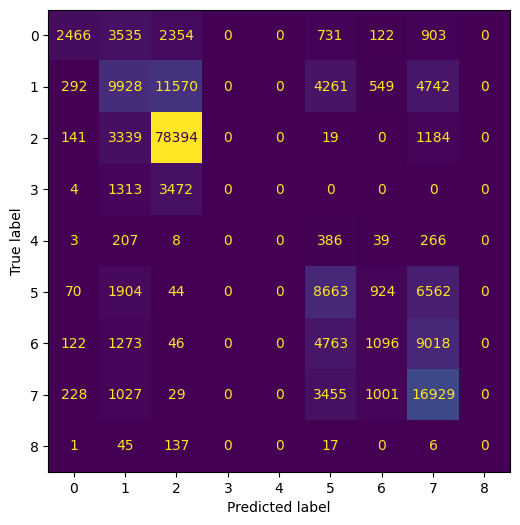

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test_svc, rbf_pred, labels=rbf.classes_, ax=ax, colorbar=False
)
plt.show()

In [8]:
from sklearn import tree

In [9]:
clf = tree.DecisionTreeClassifier()

In [10]:
clf_dt = clf.fit(X_train_svc, y_train_svc)

In [31]:
dt_predict = clf_dt.predict(X_test_svc)

In [30]:
tree_score = clf_dt.score(X_test_svc, y_test_svc)
print('Score Decision Tree: ', "%.2f" % (tree_score*100))

Score Decision Tree:  84.90


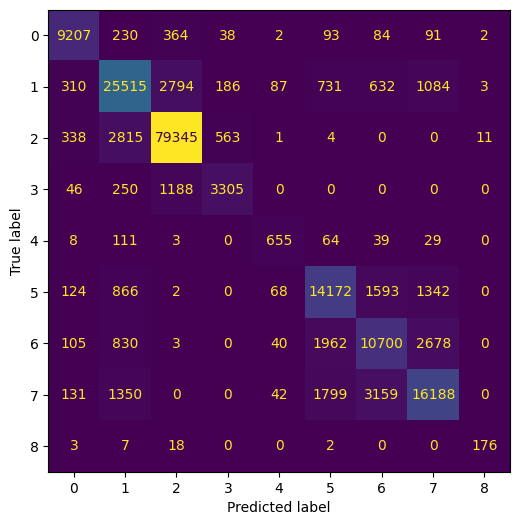

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test_svc, dt_predict, labels=clf_dt.classes_, ax=ax, colorbar=False
)
plt.show()

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gb_clf = GradientBoostingClassifier(n_estimators=1000)
gb_clf_model = gb_clf.fit(X_train_svc, y_train_svc.values.ravel())

In [44]:
gb_score = gb_clf_model.score(X_test_svc, y_test_svc)

In [45]:
print('Score GradientBoosting: ', "%.2f" % (gb_score*100))

Score GradientBoosting:  75.41


In [46]:
gb_predict = gb_clf_model.predict(X_test_svc)

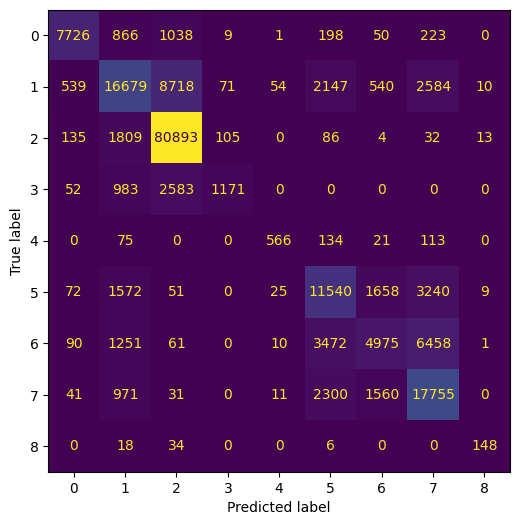

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test_svc, gb_predict, labels=gb_clf_model.classes_, ax=ax, colorbar=False
)
plt.show()

In [ ]:
tree.plot_tree(clf_dt)